## Installing the required libraries

In [28]:
#import all of the required libraries and classes right here


import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.simplefilter('ignore')

## Data Ingestion

In [29]:
df=pd.read_excel('CH_2_Coffee Shop data.xlsx')
population=pd.read_csv('population.csv',skiprows=[0])

In [30]:
population.head()

Geography Label for GEO_ID  Race/Ethnic Group Population Groups  \
0  8600000US89010      ZCTA5 89010                  1  Total population   
1  8600000US89019      ZCTA5 89019                  1  Total population   
2  8600000US89060      ZCTA5 89060                  1  Total population   
3  8600000US89061      ZCTA5 89061                  1  Total population   
4  8600000US89439      ZCTA5 89439                  1  Total population   

   Total  Errata of Total  Total!!1-person household  \
0    172              NaN                         51   
1   1164              NaN                        412   
2   4144              NaN                       1106   
3   2109              NaN                        469   
4    671              NaN                        193   

   Total!!2-person household  Total!!3-person household  \
0                         69                         19   
1                        421                        134   
2                       1714                        550   
3                        936                        283   
4                        314                         88   

   Total!!4-person household  Total!!5-person household  \
0                         12                         12   
1                         83                         57   
2                        361                        222   
3                        206                        112   
4                         55                         17   

   Total!!6-person household  Total!!7-or-more-person household  
0                          4                                  5  
1                         32                                 25  
2                         95                                 96  
3                         62                                 41  
4                          2                                  2

In [31]:
df.head()#checking first five rows

ID no.   Business Name           Street address       City       State  \
0       1      Brew Haven        8 Old Shore Place    Oakland  California   
1       2      Bean Bliss  6650 Clarendon Crossing   Stockton  California   
2       3   Caffeine Cove          7281 Buell Road     Fresno  California   
3       4       Mug Magic       670 Jackson Avenue   Torrance  California   
4       5     Daily Grind     37 Ludington Terrace  San Diego  California   

   Zip Code         Phone  Rating Gender majority  Median Salary  Latte Price  
0     94616  415-810-4769     4.5            Male          72463         3.31  
1     95210  209-701-1665     5.0          Female          87117         5.35  
2     93773  559-137-3554     4.7            Male          86394         4.15  
3     90510  818-789-5573     4.3            Male          88343         5.34  
4     92196  619-354-2389     1.6            Male          77795         3.11

In [32]:
# check for data info
df.info()
#our data types checks out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [33]:
#check the number of records and features
df.shape

(1000, 11)

In [34]:
population.shape

(1705, 13)

In [35]:
# get basic stats about the data
df.describe()
#see avergae latte price and salary

ID no.      Zip Code       Rating  Median Salary  Latte Price
count  1000.000000   1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000  92976.163000     3.784600   81182.842000     5.039030
std     288.819436   1706.943177     1.150717    5142.670356     1.153467
min       1.000000  90005.000000     1.000000   72001.000000     3.000000
25%     250.750000  91751.750000     3.200000   76776.000000     4.057500
50%     500.500000  92883.000000     4.240000   81113.000000     5.040000
75%     750.250000  94257.000000     4.580000   85684.000000     6.020000
max    1000.000000  96154.000000     5.000000   89978.000000     6.990000

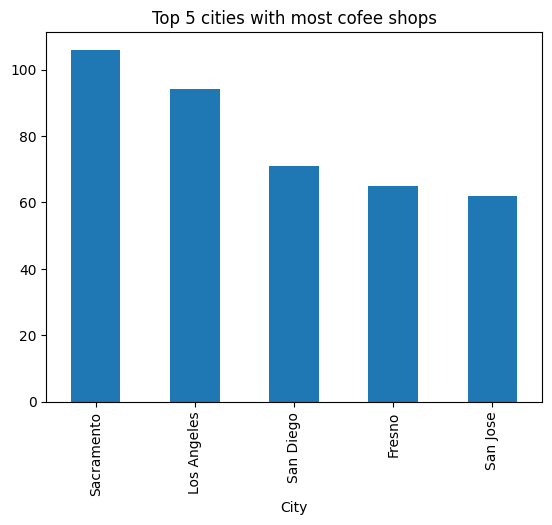

In [36]:
ax=df['City'].value_counts().head(5).plot(kind='bar')
ax.set_title('Top 5 cities with most cofee shops')
plt.show()

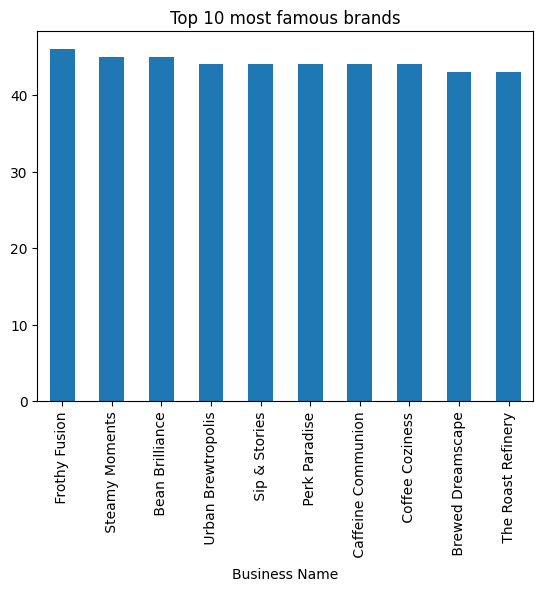

In [37]:
ax=df['Business Name'].value_counts().head(10).plot(kind='bar')
ax.set_title('Top 10 most famous brands')
plt.show()

## Data Preprocessing

In [38]:
df.isna().sum()
# no null values
# if we have null values we would impute it. If we have numberical replace mean. Missing values - replace it with the mode (most occuring values)

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

In [39]:
#converting zipcode to object data (str) - We need to join the zip code with the population data. Converting the coffee shop data. In order to store it into alphanumerical value, it should be string.
df['Zip Code']=df['Zip Code'].astype(str)

In [40]:
#extract zip code from population
# Find all of the zipcode that has a 5 digit pattern. Getting the last 5 digits from the population zip code. Creating a new column called zip code

def find_zip_code(geocode):
    pattern = r'\d{5}$'

    match = re.search(pattern, geocode)

    if match:
        zip_code = match.group(0)
    return zip_code


In [41]:
# The actual coversion is below. The above is the function

population['Zip Code']=population['Geography'].apply(find_zip_code)

In [42]:
cafe_data=df.copy()
# merging the population via zip code as population is an important feature to determing the price / locations
df=pd.merge(cafe_data,population)
#notice that the data size is reduced afer a join

In [43]:
#keeping only Total from population. In the pop dataset, keeping total population column and other columns.
columns=cafe_data.columns.values.tolist()+['Total']
df=df[columns]
#rename Total to Population
df=df.rename(columns={"Total":"Population"})

In [44]:
df

ID no.        Business Name           Street address          City  \
0         2           Bean Bliss  6650 Clarendon Crossing      Stockton   
1         6    Espresso Elegance         8427 Atwood Road       Visalia   
2        10          Perk Palace         7 David Junction        Fresno   
3        11    The Coffee Cartel  6018 Rockefeller Center        Orange   
4        14      Grindhouse Cafe   7846 Cherokee Junction       Visalia   
..      ...                  ...                      ...           ...   
407     982        Perk Paradise   4 Park Meadow Crossing      Van Nuys   
408     983   Urban Brewtropolis   2459 Golden Leaf Place  Santa Monica   
409     985   Caffeine Communion       40 Sommers Parkway      San Jose   
410     998   Urban Brewtropolis        141 Burrows Place   Los Angeles   
411     999       Steamy Moments  42004 Bellgrove Terrace        Orange   

          State Zip Code         Phone  Rating Gender majority  Median Salary  \
0    California    95210  209-701-1665    5.00          Female          87117   
1    California    93291  559-929-4731    1.20          Female          78753   
2    California    93726  559-323-2365    4.20          Female          80973   
3    California    92867  714-292-8390    1.90            Male          74340   
4    California    93291  559-253-9426    4.50            Male          78753   
..          ...      ...           ...     ...             ...            ...   
407  California    91411  818-584-8823    4.00          Female          76034   
408  California    90405  818-215-2671    4.82          Female          86920   
409  California    95133  408-304-3646    4.04          Female          78176   
410  California    90035  323-785-4094    3.00            Male          87604   
411  California    92867  714-506-9394    4.50            Male          74340   

     Latte Price  Population  
0           5.35       11180  
1           6.90       15310  
2           6.29       13942  
3           3.61       13284  
4           6.67       15310  
..           ...         ...  
407         5.95        9177  
408         3.18       14376  
409         3.69        7365  
410         4.64       12814  
411         3.82       13284  

[412 rows x 12 columns]

In [45]:
#keeping only relevant features
df= df[['Zip Code','Rating','Median Salary','Latte Price','Population']]
#df.shape


In [46]:
df.columns    

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')

In [47]:
# Calculate the total number of coffee shops for each zip code
coffee_shop_counts = df['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Ensure 'Zip Code' is of type string in both DataFrames
df['Zip Code'] = df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

# Merge the counts back into the original DataFrame
df = df.merge(coffee_shop_counts, on='Zip Code', how='left')

# Print the updated DataFrame
print(df)

# Criteria:
# a. High population
# b. Low total number of coffee shops
# c. Low ratings
# d. High median salary

# Sorting the DataFrame based on the criteria
sorted_df = df.sort_values(by=['Population', 'CoffeeShopCount', 'Rating', 'Median Salary'],
                           ascending=[False, True, True, False]).reset_index(drop=True)


    Zip Code  Rating  Median Salary  Latte Price  Population  CoffeeShopCount
0      95210    5.00          87117         5.35       11180                4
1      93291    1.20          78753         6.90       15310                7
2      93726    4.20          80973         6.29       13942                5
3      92867    1.90          74340         3.61       13284                9
4      93291    4.50          78753         6.67       15310                7
..       ...     ...            ...          ...         ...              ...
407    91411    4.00          76034         5.95        9177                8
408    90405    4.82          86920         3.18       14376                3
409    95133    4.04          78176         3.69        7365                6
410    90035    3.00          87604         4.64       12814                5
411    92867    4.50          74340         3.82       13284                9

[412 rows x 6 columns]


In [48]:
# Created a list - if length of list 5, if the zip code is already present, it will not add that into the list. 
# Deduping zip code column and displaying all of the records for the top 5.
lst=[]
for i in range(len(sorted_df)):
    if len(lst)!=5:
        if (sorted_df['Zip Code'][i]) not in lst:
            lst.append(sorted_df['Zip Code'][i])
            
# Filter 'sorted_df' to include only rows where 'Zip Code' is in 'lst'
top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

top_5_zip_codes_df

Zip Code  Rating  Median Salary  Latte Price  Population  CoffeeShopCount
0     94110    2.22          74020         6.72       27128                5
1     94110    3.50          74020         6.73       27128                5
2     94110    4.40          74020         6.79       27128                5
3     94110    4.50          74020         5.39       27128                5
4     94110    4.70          74020         4.40       27128                5
5     90805    3.00          88140         5.36       26056                4
6     90805    3.89          88140         4.56       26056                4
7     90805    4.31          88140         3.07       26056                4
8     90805    4.37          88140         4.00       26056                4
9     95823    4.30          73165         6.55       22470                3
10    95823    4.82          73165         6.07       22470                3
11    95823    4.94          73165         4.07       22470                3
12    94544    3.98          72092         6.72       21872                6
13    94544    4.12          72092         6.78       21872                6
14    94544    4.17          72092         5.93       21872                6
15    94544    4.24          72092         5.20       21872                6
16    94544    4.24          72092         6.56       21872                6
17    94544    4.86          72092         4.93       21872                6
18    90025    4.50          85001         5.62       21228                1

In [60]:
X = df.drop(['Latte Price', 'Zip Code'], axis=1)  # Features excluding 'Latte Price' and 'Zip Code'
y = df['Latte Price']  # Target variable


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
#Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [53]:
#Hyperparameter Tuning
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]},
}


In [54]:
for model_name, model in models.items():
    if model_name in param_grid:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)

        # Set the best hyperparameters to the model
        models[model_name] = grid_search.best_estimator_


In [55]:
#Model Training
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

In [56]:
# Model Evaluation
for model_name, model in models.items():
    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print()



Linear Regression Metrics:
Mean Absolute Error: 1.0547126082234295
Mean Squared Error: 1.5031963663048509
R-squared: -0.035021693732844694

Random Forest Metrics:
Mean Absolute Error: 1.1512576256777163
Mean Squared Error: 1.8319949686629486
R-squared: -0.2614150605197987

Gradient Boosting Metrics:
Mean Absolute Error: 1.0287811894795094
Mean Squared Error: 1.462008449386631
R-squared: -0.006661867641182928



In [57]:
#We want this dataframe to be same as the training data so that model can predict the value
zip_codes_df= top_5_zip_codes_df.drop(['Zip Code', 'Latte Price'], axis=1)
zip_codes_df= sc.transform(zip_codes_df)

In [58]:
for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    print(f"{model_name} Predicted Prices for Top 5 Zip Codes:")
    print(predicted_prices)
    print()

Linear Regression Predicted Prices for Top 5 Zip Codes:
[5.43709834 5.42410014 5.41496078 5.41394529 5.41191432 4.85043494
 4.84139713 4.8371321  4.8365228  5.39989528 5.39461476 5.39339618
 5.50191473 5.50049305 5.49998531 5.49927447 5.49927447 5.49297847
 4.88949225]

Random Forest Predicted Prices for Top 5 Zip Codes:
[6.51412667 6.58732667 6.23419476 6.25199476 6.2483781  5.12773008
 4.71575126 4.3406412  4.33510237 6.20360343 5.88508333 4.3952
 6.52065833 6.47945833 5.90935833 5.414475   5.414475   5.121725
 4.56599603]

Gradient Boosting Predicted Prices for Top 5 Zip Codes:
[5.50143187 5.50143187 5.50143187 5.50143187 5.50143187 5.05132246
 5.05132246 4.94803805 4.94803805 5.50143187 5.50143187 4.95587306
 5.50143187 5.50143187 5.50143187 5.50143187 5.50143187 5.2080744
 4.97221276]



In [59]:
predictions = {}

for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    predictions[model_name] = predicted_prices

# Convert the predictions dictionary to a DataFrame
predictions_df = pd.DataFrame(predictions)
# Add the zip codes to the predictions DataFrame
predictions_df['Zip Code'] = top_5_zip_codes_df['Zip Code'].values

# Rearrange the columns to have 'Zip Code' as the first column
cols = ['Zip Code'] + [col for col in predictions_df.columns if col != 'Zip Code']
predictions_df = predictions_df[cols]

predictions_df

Zip Code  Linear Regression  Random Forest  Gradient Boosting
0     94110           5.437098       6.514127           5.501432
1     94110           5.424100       6.587327           5.501432
2     94110           5.414961       6.234195           5.501432
3     94110           5.413945       6.251995           5.501432
4     94110           5.411914       6.248378           5.501432
5     90805           4.850435       5.127730           5.051322
6     90805           4.841397       4.715751           5.051322
7     90805           4.837132       4.340641           4.948038
8     90805           4.836523       4.335102           4.948038
9     95823           5.399895       6.203603           5.501432
10    95823           5.394615       5.885083           5.501432
11    95823           5.393396       4.395200           4.955873
12    94544           5.501915       6.520658           5.501432
13    94544           5.500493       6.479458           5.501432
14    94544           5.499985       5.909358           5.501432
15    94544           5.499274       5.414475           5.501432
16    94544           5.499274       5.414475           5.501432
17    94544           5.492978       5.121725           5.208074
18    90025           4.889492       4.565996           4.972213

In [62]:
agg_df = predictions_df.groupby('Zip Code')['Gradient Boosting'].agg([("Highest", "max"), ("Lowest", "min")]).reset_index()
agg_df.columns = ['Zip Code', 'Highest', 'Lowest']
print(agg_df)

  Zip Code   Highest    Lowest
0    90025  4.972213  4.972213
1    90805  5.051322  4.948038
2    94110  5.501432  5.501432
3    94544  5.501432  5.208074
4    95823  5.501432  4.955873
